## Open Cap Football Kick Performance Analysis

In [1]:
'''
Format being used : 

{
    PathFileType : "",
    DataRate : "",
    CameraRate : "",
    .....
    Frame : [],
    Time : [],
    Neck : {
            x : [],
            y : [],
            z : []
    },
    RShoulder : {
        x : [],
        y : [],
        z : []
    },
    RElbow : {
        x : [],
        y : [],
        z : []
    }
}
'''

'\nFormat being used : \n\n{\n    PathFileType : "",\n    DataRate : "",\n    CameraRate : "",\n    .....\n    Frame : [],\n    Time : [],\n    Neck : {\n            x : [],\n            y : [],\n            z : []\n    },\n    RShoulder : {\n        x : [],\n        y : [],\n        z : []\n    },\n    RElbow : {\n        x : [],\n        y : [],\n        z : []\n    }\n}\n'

In [2]:
def readMarkerData(file_path):
    data = ""
    pathFile = ""
    ex_title_list = []
    ex_data_list = []
    titles = []

    data = []
    with open(file_path) as file:
        count = 0
        for line in file:
            if(count==0):
                l = line.split(" ")
#                 print(l)
                pathFile = l[3]
            elif(count == 1):
                l = line.split("\t")
                ex_title_list = l
            elif(count == 2):
                l = line.split("\t")
                ex_data_list = l
            elif(count == 3):
                l = line.split("\t")
                # Remove spaces from each element using list comprehension
                l = [item for item in l if item != ""]
                titles = l
                # Print the result
#                 print(l)

            elif (count == 4 or count == 5):
                pass

            else:
                l = line.split("\t")
                data.append(l)


            count+=1
#     print(data)
    
    
    last_string = ex_title_list[-1].rstrip('\n')
    ex_title_list[-1] = last_string

    last_string = ex_data_list[-1].rstrip('\n')
    ex_data_list[-1] = last_string
    
    dataDict = {}
    
    dataDict['PathFileType'] = pathFile
    
    
    # dataDict

    # For Data rate, Camera Rate etc
    for i in range(len(ex_title_list)):
        dataDict[ex_title_list[i]] = ex_data_list[i]

    datas = {}

    a = 2
    for i in range(len(data)):
        for j in range(len(data[i])):
            try:
                datas[str(j)].append(data[i][j])
            except:
                datas[str(j)] = [data[i][j]]

#     print(datas)
    # datas['3']
    # For the Titles
    count = 0
    for i in range(len(titles)):
        if(i < 2):
            dataDict[titles[i]] = datas[str(count)]
            count=count+1
        else:
            try:
                dataDict[titles[i]] = {}
                dataDict[titles[i]]['X'] = datas[str(count)]
                dataDict[titles[i]]['Y'] = datas[str(count+1)]
                dataDict[titles[i]]['Z'] = datas[str(count+2)]
                count=count+3
            except:
                pass
    return dataDict

In [4]:
markerData = readMarkerData("C:/Users/Jatin/Desktop/Engineering/ROBOTICS PROGRAM NUS/PROJECT/OpenCAP/DATA/NUS_PROJECT_DATA/MarkerData/Football_Bad.trc")

In [5]:
markerData

{'PathFileType': '/workspace/Data/6dd8842f-6dd1-47d4-a9a5-5e84619526cd/MarkerData/PostAugmentation\n',
 'DataRate': '60.0',
 'CameraRate': '60.0',
 'NumFrames': '393',
 'NumMarkers': '63',
 'Units': 'm',
 'OrigDataRate': '60.0',
 'OrigDataStartFrame': '1',
 'OrigNumFrames': '393',
 'Frame#': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90

In [6]:
X = []
Y = []
Z = []
Labels = []

flag = 0
for key, value in markerData.items():
    if(key == "Time"):
        flag = 1
        continue
    if(flag == 1):
        try:
            if(key == "Neck" or key == "RShoulder" or key == "RElbow" or key == "RWrist" or key == "LShoulder" or key == "LElbow" or key == "LWrist" or key == "midHip" or key == "RHip" or key == "RKnee" or key == "RAnkle" or key == "LHip" or key == "LKnee" or key == "LAnkle" or key == "LBigToe" or key == "LSmallToe" or key == "LHeel" or key == "RBigToe" or key == "RSmallToe" or key == "RHeel"):
                x = value['X'][200]
                y = value['Y'][200]
                z = value['Z'][200]
                labels = key


                X.append(float(x))
                Y.append(float(y))
                Z.append(float(z))
                Labels.append(labels)
        except:
            pass
        

In [7]:
X, Y, Z, Labels

([0.46418,
  0.46279,
  0.47722,
  0.58808,
  0.48484,
  0.51636,
  0.58646,
  0.57952,
  0.58593,
  0.81528,
  0.87181,
  0.58064,
  0.55117,
  0.49357,
  0.67245,
  0.66111,
  0.45859,
  1.03936,
  1.0347,
  0.84582],
 [1.4933008,
  1.4897608,
  1.2010208,
  0.9320008,
  1.4974608,
  1.1916908,
  0.9271908,
  0.9596508,
  0.9716208,
  0.6372008,
  0.1797108,
  0.9497208,
  0.5259508,
  0.0647608,
  0.0411908,
  0.0417408,
  0.0252108,
  0.1262408,
  0.1276508,
  0.1309608],
 [-0.16072,
  0.02012,
  0.09761,
  0.1312,
  -0.33785,
  -0.37551,
  -0.37288,
  -0.11428,
  0.00652,
  -0.01042,
  -0.00192,
  -0.23441,
  -0.18109,
  -0.11741,
  -0.12436,
  -0.12564,
  -0.11083,
  0.02396,
  0.02336,
  -0.02101],
 ['Neck',
  'RShoulder',
  'RElbow',
  'RWrist',
  'LShoulder',
  'LElbow',
  'LWrist',
  'midHip',
  'RHip',
  'RKnee',
  'RAnkle',
  'LHip',
  'LKnee',
  'LAnkle',
  'LBigToe',
  'LSmallToe',
  'LHeel',
  'RBigToe',
  'RSmallToe',
  'RHeel'])

### Defining Line Segments(Defining the Human Shape) : 


In [8]:
# Define pairs for lines
line_segments = [((Labels.index("Neck"), Labels.index("RShoulder"))), ((Labels.index("Neck"), Labels.index("LShoulder"))),((Labels.index("RShoulder"), Labels.index("RElbow"))),
                ((Labels.index("RElbow"), Labels.index("RWrist"))), ((Labels.index("LElbow"), Labels.index("LShoulder"))),((Labels.index("LElbow"), Labels.index("LWrist"))),
                ((Labels.index("Neck"), Labels.index("midHip"))), ((Labels.index("midHip"), Labels.index("RHip"))), ((Labels.index("midHip"), Labels.index("LHip"))), 
                ((Labels.index("LHip"), Labels.index("LKnee"))), ((Labels.index("LKnee"), Labels.index("LAnkle"))), ((Labels.index("LAnkle"), Labels.index("LHeel"))),
                ((Labels.index("LAnkle"), Labels.index("LSmallToe"))), ((Labels.index("LAnkle"), Labels.index("LBigToe"))), ((Labels.index("RHip"), Labels.index("RKnee"))),
                ((Labels.index("RKnee"), Labels.index("RAnkle"))),((Labels.index("RAnkle"), Labels.index("RHeel"))), ((Labels.index("RAnkle"), Labels.index("RBigToe"))),
                ((Labels.index("RAnkle"), Labels.index("RSmallToe")))]

In [9]:
import plotly.graph_objects as go

# Replace these with your actual XYZ coordinates and point labels
x_points = X
y_points = Y
z_points = Z
point_labels = Labels  # Add labels for each point

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=x_points,
    y=y_points,
    z=z_points,
    mode='markers',
    marker=dict(size=8, color='red'),
    text=point_labels,
    hoverinfo='text',  # Show only the text on hover
)])

# Scatter3d trace for lines
for segment in line_segments:
    x_segment = [x_points[i] for i in segment]
    y_segment = [y_points[i] for i in segment]
    z_segment = [z_points[i] for i in segment]

    line_trace = go.Scatter3d(
        x=x_segment,
        y=y_segment,
        z=z_segment,
        mode='lines',
        line=dict(color="Red", width=2),
    )

    fig.add_trace(line_trace)

# Set X-axis range
fig.update_layout(scene=dict(xaxis=dict(range=[0, 2])))


# Set axis labels
fig.update_layout(scene=dict(xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis'))

# Show the plot
fig.show()


In [11]:
def readKinematicsData(file_path):
    dataDict = {}
    titles = []
    data = []
    with open(file_path) as file:
        count = 0
        for line in file:
            if(count == 0 or count == 1 or count == 5 or count == 7 or count == 8 or count == 9):
                pass
            elif(count == 2 or count == 3 or count ==  4):
                l = line.split("=")
                dataDict[l[0]] = l[1]
            elif(count == 6):
                dataDict["Units"] = line
            elif(count == 10):
                l = line.split("\t")
                titles = l
            else:
                l = line.split("\t")
                data.append(l)

            count = count+1
    datas = {}
    for i in range(len(data)):
        for j in range(len(data[i])):
            try:
                datas[str(j)].append(data[i][j])
            except:
                datas[str(j)] = [data[i][j]]
    for i in range(len(titles)):
        dataDict[titles[i]] = datas[str(i)]
    
    return dataDict

## Football Kick Performance Analysis  Initial 

In [12]:
data = readKinematicsData("C:/Users/Jatin/Desktop/Engineering/ROBOTICS PROGRAM NUS/PROJECT/OpenCAP/DATA/NUS_PROJECT_DATA/OpenSimData/Kinematics/Football_Bad.mot")

In [13]:
data

{'nRows': '393\n',
 'nColumns': '36\n',
 'inDegrees': 'yes\n',
 'Units': 'Units are S.I. units (second, meters, Newtons, ...)\n',
 'time': ['      0.00000000',
  '      0.01666670',
  '      0.03333330',
  '      0.05000000',
  '      0.06666670',
  '      0.08333330',
  '      0.10000000',
  '      0.11666670',
  '      0.13333330',
  '      0.15000000',
  '      0.16666670',
  '      0.18333330',
  '      0.20000000',
  '      0.21666670',
  '      0.23333330',
  '      0.25000000',
  '      0.26666670',
  '      0.28333330',
  '      0.30000000',
  '      0.31666670',
  '      0.33333330',
  '      0.35000000',
  '      0.36666670',
  '      0.38333330',
  '      0.40000000',
  '      0.41666670',
  '      0.43333330',
  '      0.45000000',
  '      0.46666670',
  '      0.48333330',
  '      0.50000000',
  '      0.51666670',
  '      0.53333330',
  '      0.55000000',
  '      0.56666670',
  '      0.58333330',
  '      0.60000000',
  '      0.61666670',
  '      0.63333330',
  ' 

In [14]:
time1 = data["time"]
time1 = [float(i) for i in time1]
time1

[0.0,
 0.0166667,
 0.0333333,
 0.05,
 0.0666667,
 0.0833333,
 0.1,
 0.1166667,
 0.1333333,
 0.15,
 0.1666667,
 0.1833333,
 0.2,
 0.2166667,
 0.2333333,
 0.25,
 0.2666667,
 0.2833333,
 0.3,
 0.3166667,
 0.3333333,
 0.35,
 0.3666667,
 0.3833333,
 0.4,
 0.4166667,
 0.4333333,
 0.45,
 0.4666667,
 0.4833333,
 0.5,
 0.5166667,
 0.5333333,
 0.55,
 0.5666667,
 0.5833333,
 0.6,
 0.6166667,
 0.6333333,
 0.65,
 0.6666667,
 0.6833333,
 0.7,
 0.7166667,
 0.7333333,
 0.75,
 0.7666667,
 0.7833333,
 0.8,
 0.8166667,
 0.8333333,
 0.85,
 0.8666667,
 0.8833333,
 0.9,
 0.9166667,
 0.9333333,
 0.95,
 0.9666667,
 0.9833333,
 1.0,
 1.0166667,
 1.0333333,
 1.05,
 1.0666667,
 1.0833333,
 1.1,
 1.1166667,
 1.1333333,
 1.15,
 1.1666667,
 1.1833333,
 1.2,
 1.2166667,
 1.2333333,
 1.25,
 1.2666667,
 1.2833333,
 1.3,
 1.3166667,
 1.3333333,
 1.35,
 1.3666667,
 1.3833333,
 1.4,
 1.4166667,
 1.4333333,
 1.45,
 1.4666667,
 1.4833333,
 1.5,
 1.5166667,
 1.5333333,
 1.55,
 1.5666667,
 1.5833333,
 1.6,
 1.6166667,
 1.633

#### Arm Rotation Left

In [15]:
arm_rot_l_1 = data["arm_rot_l"]
arm_rot_l_1 = [float(i) for i in arm_rot_l_1]
arm_rot_l_1

[20.51958627,
 19.67445637,
 18.32473712,
 18.02546811,
 17.75703961,
 17.51912116,
 17.55882996,
 17.62532638,
 17.66543443,
 17.65800023,
 17.28968781,
 18.06850666,
 17.57905424,
 17.44287092,
 17.09487406,
 16.61277033,
 16.33766448,
 15.93206808,
 15.36651983,
 14.91755815,
 14.62163389,
 14.54179722,
 14.40637741,
 14.17906459,
 13.7012485,
 13.30001046,
 13.03783568,
 12.61450644,
 12.58681119,
 12.51760698,
 12.37005826,
 10.99358476,
 10.95256634,
 10.8950658,
 10.90488872,
 11.20741605,
 11.33195448,
 11.49705713,
 11.70826932,
 11.93765378,
 12.05694377,
 12.1426229,
 11.96019892,
 11.91290772,
 12.07143511,
 12.23592519,
 12.55555411,
 12.77024066,
 13.09734627,
 13.3964407,
 13.57918261,
 15.17882371,
 17.0976847,
 17.41615563,
 17.57862961,
 18.546805,
 19.31964011,
 19.43978302,
 19.60812888,
 19.72005363,
 19.58035096,
 19.467234,
 19.36190061,
 19.30012603,
 19.25478237,
 18.70891153,
 18.65231259,
 17.80596402,
 17.72534832,
 17.03614315,
 16.56625257,
 16.49754202,
 

Text(0.5, 1.0, 'Person 1, Arm Rotation L(Not the Optimum Performance)')

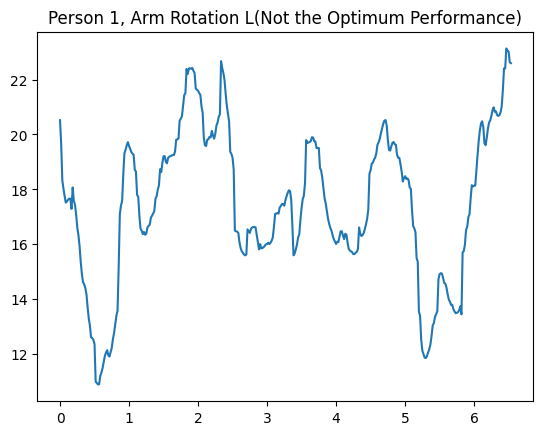

In [16]:
import matplotlib.pyplot as plt

plt.plot(time1, arm_rot_l_1)
plt.title("Person 1, Arm Rotation L(Not the Optimum Performance)")

#### Arm Rotation Right

In [17]:
arm_rot_r_1 = data["arm_rot_r"]
arm_rot_r_1 = [float(i) for i in arm_rot_r_1]
arm_rot_r_1

[18.91561848,
 16.82470689,
 11.3455852,
 10.21427808,
 9.43332289,
 8.81112734,
 8.73411387,
 8.87779683,
 9.13652829,
 9.75710166,
 9.8268975,
 11.44078723,
 11.03948234,
 11.02036344,
 11.35284839,
 11.17854338,
 11.3519047,
 11.22878688,
 11.09755078,
 11.75917314,
 11.94197881,
 11.80081956,
 11.54554583,
 11.18977636,
 10.56733358,
 10.1832491,
 9.81461346,
 9.27502818,
 9.12049118,
 8.87575375,
 8.50293865,
 6.411865,
 6.24308727,
 6.07506262,
 5.98487758,
 6.1653981,
 6.02827381,
 6.0183744,
 6.14878289,
 6.34564389,
 6.81440119,
 7.17410195,
 7.57259162,
 8.21607281,
 8.63742788,
 8.95168291,
 9.32747681,
 9.52404548,
 9.81116984,
 10.05950389,
 10.12200504,
 10.39022522,
 9.98868454,
 9.33015599,
 8.91921835,
 8.56923069,
 8.04951638,
 7.70637911,
 7.61778313,
 7.67990134,
 7.6615978,
 7.60005491,
 7.61611836,
 7.77356484,
 7.8463697,
 8.60857209,
 8.6394165,
 9.21648658,
 9.26023212,
 10.20350937,
 10.60231382,
 10.6543635,
 10.71974924,
 11.06327741,
 10.89527138,
 11.01263

#### Arm Rotation Left

In [18]:
arm_rot_l_2 = data["arm_rot_l"]
arm_rot_l_2 = [float(i) for i in arm_rot_l_2]
arm_rot_l_2

[20.51958627,
 19.67445637,
 18.32473712,
 18.02546811,
 17.75703961,
 17.51912116,
 17.55882996,
 17.62532638,
 17.66543443,
 17.65800023,
 17.28968781,
 18.06850666,
 17.57905424,
 17.44287092,
 17.09487406,
 16.61277033,
 16.33766448,
 15.93206808,
 15.36651983,
 14.91755815,
 14.62163389,
 14.54179722,
 14.40637741,
 14.17906459,
 13.7012485,
 13.30001046,
 13.03783568,
 12.61450644,
 12.58681119,
 12.51760698,
 12.37005826,
 10.99358476,
 10.95256634,
 10.8950658,
 10.90488872,
 11.20741605,
 11.33195448,
 11.49705713,
 11.70826932,
 11.93765378,
 12.05694377,
 12.1426229,
 11.96019892,
 11.91290772,
 12.07143511,
 12.23592519,
 12.55555411,
 12.77024066,
 13.09734627,
 13.3964407,
 13.57918261,
 15.17882371,
 17.0976847,
 17.41615563,
 17.57862961,
 18.546805,
 19.31964011,
 19.43978302,
 19.60812888,
 19.72005363,
 19.58035096,
 19.467234,
 19.36190061,
 19.30012603,
 19.25478237,
 18.70891153,
 18.65231259,
 17.80596402,
 17.72534832,
 17.03614315,
 16.56625257,
 16.49754202,
 

Text(0.5, 1.0, 'Person 1, Arm Rotation R(Not the Optimum Performance)')

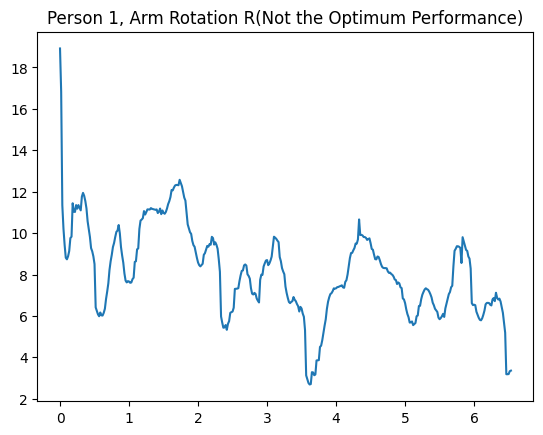

In [19]:
import matplotlib.pyplot as plt

plt.plot(time1, arm_rot_r_1)
plt.title("Person 1, Arm Rotation R(Not the Optimum Performance)")

#### Arm Flex Right

In [20]:
arm_flex_r_1 = data["arm_flex_r"]
arm_flex_r_1 = [float(i) for i in arm_flex_r_1]
arm_flex_r_1

[4.68881759,
 3.55244676,
 2.19952039,
 1.62359961,
 1.37183695,
 1.37333888,
 1.59126182,
 1.78735969,
 2.19036078,
 2.59721433,
 3.10515982,
 3.69302407,
 4.0644525,
 4.22766053,
 4.66782347,
 4.95268431,
 5.1307003,
 5.48719002,
 5.89094716,
 6.16871612,
 6.36766191,
 6.39080257,
 6.3862377,
 6.58746506,
 6.63282513,
 6.54181953,
 6.46348368,
 6.32824831,
 6.16781494,
 5.90888545,
 5.79182122,
 5.40103463,
 5.08579739,
 4.96114902,
 4.69247922,
 4.89999959,
 4.66488168,
 4.61395538,
 4.54798773,
 4.3836093,
 4.31944902,
 4.03273556,
 4.25719024,
 4.50740923,
 5.06301636,
 5.45557848,
 5.79080073,
 6.02975201,
 6.33145291,
 6.46312313,
 6.55793411,
 6.48128102,
 5.92696299,
 5.48910523,
 4.85623275,
 4.43796841,
 3.95350343,
 3.5682133,
 3.36414538,
 3.18163946,
 3.19950111,
 3.34611912,
 3.3715761,
 3.57030849,
 3.57573845,
 4.05807844,
 4.13883262,
 4.36891123,
 4.36317966,
 4.59495682,
 4.63935437,
 4.64615714,
 4.43257809,
 4.24363632,
 4.0403438,
 3.8620082,
 3.71188507,
 3.4375

Text(0.5, 1.0, 'Person 1, Arm Flexion R(Not the Optimum Performance)')

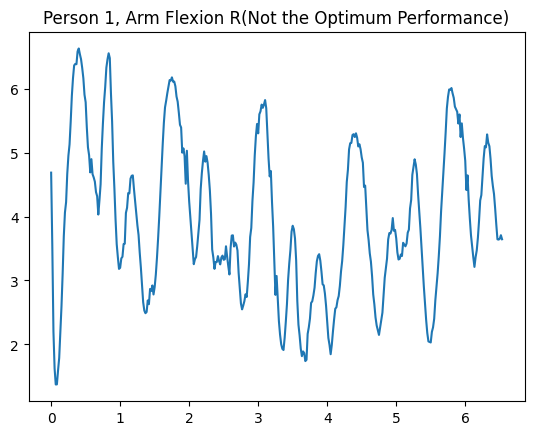

In [21]:
import matplotlib.pyplot as plt

plt.plot(time1, arm_flex_r_1)
plt.title("Person 1, Arm Flexion R(Not the Optimum Performance)")

#### Arm Flex Left

In [22]:
arm_flex_l_1 = data["arm_flex_l"]
arm_flex_l_1 = [float(i) for i in arm_flex_l_1]
arm_flex_l_1

[1.12375549,
 0.74375717,
 0.3104527,
 -0.3368012,
 -0.68492769,
 -0.55288288,
 -0.28708976,
 0.01836935,
 0.33772643,
 0.59629832,
 0.96006972,
 1.37422676,
 1.86401157,
 2.1378355,
 2.76784069,
 3.40577646,
 3.9244729,
 4.49422396,
 4.92343886,
 5.54245506,
 5.86320511,
 5.90486097,
 5.91657951,
 5.92449275,
 5.86600572,
 5.6926204,
 5.55943481,
 5.44229097,
 5.21496628,
 5.01878044,
 4.81458102,
 4.48906605,
 4.07861676,
 3.64397591,
 3.15796035,
 2.99584967,
 2.83056276,
 2.56341778,
 2.27549513,
 1.77096325,
 0.94671746,
 -0.06220797,
 -0.53770974,
 -0.6325461,
 -0.17939651,
 0.32439583,
 0.82704984,
 1.22173191,
 1.62412015,
 2.03518038,
 2.38210629,
 3.10340327,
 3.90292339,
 4.38407685,
 4.60329183,
 5.21577324,
 5.52122223,
 5.47996119,
 5.54068901,
 5.34296457,
 5.23567433,
 5.42974928,
 5.31135404,
 5.4022073,
 5.32098334,
 5.10162327,
 4.90864188,
 4.64875301,
 4.4250854,
 4.38436911,
 4.16683457,
 3.96749823,
 3.70360073,
 3.39324152,
 2.96865179,
 2.8661547,
 2.80432057,


Text(0.5, 1.0, 'Person 1, Arm Flexion L(Not the Optimum Performance)')

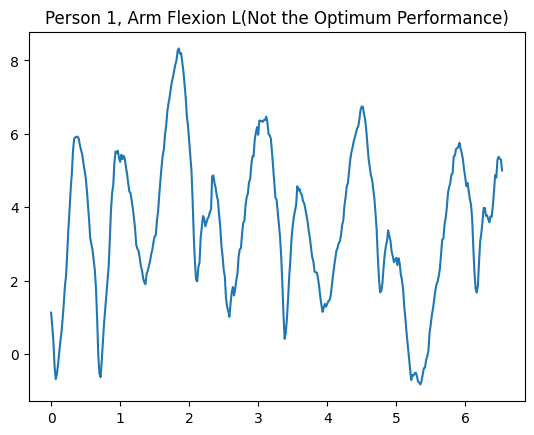

In [23]:
import matplotlib.pyplot as plt

plt.plot(time1, arm_flex_l_1)
plt.title("Person 1, Arm Flexion L(Not the Optimum Performance)")

##### Hip Flexion Data R

In [24]:
hip_flex_r_1 = data["hip_flexion_r"]
hip_flex_r_1 = [float(i) for i in hip_flex_r_1]

In [25]:
hip_flex_r_1

[0.72348215,
 5.30748762,
 7.7088516,
 9.49584078,
 11.30979942,
 13.24273285,
 15.35951677,
 18.6011892,
 22.0111687,
 25.51247665,
 28.72544958,
 31.42762537,
 33.74485352,
 35.66457665,
 37.54510956,
 39.26914066,
 40.01926197,
 40.30216702,
 40.49829715,
 40.34291226,
 40.47876618,
 40.46552074,
 40.55225947,
 40.08887109,
 38.97621001,
 38.35433256,
 36.78479988,
 35.03990155,
 33.7110084,
 33.21123168,
 33.32469834,
 33.89285155,
 33.9307971,
 34.07898874,
 34.43613858,
 34.37105131,
 33.02595037,
 30.81434719,
 28.9854481,
 26.6474716,
 23.71509655,
 21.51843554,
 23.40612754,
 27.80365594,
 30.56033227,
 31.83365246,
 31.73566024,
 31.35945245,
 30.58157268,
 30.73949003,
 31.40212281,
 31.96921967,
 32.2691687,
 32.43415216,
 32.12868371,
 32.21073549,
 31.86577007,
 31.58771186,
 31.1885693,
 30.62432678,
 30.05884202,
 29.59891315,
 28.95456786,
 28.86735283,
 28.60133111,
 28.2775881,
 28.07250222,
 28.18916851,
 28.40733088,
 29.03528079,
 29.80926193,
 30.02837152,
 30.38

Text(0.5, 1.0, 'Person 1, Hip Flexion R(Not the Optimum Performance)')

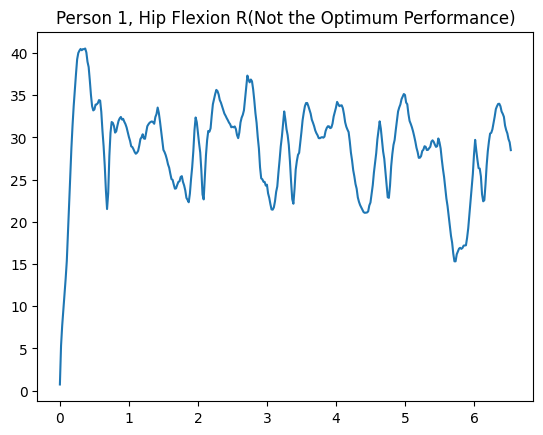

In [26]:
import matplotlib.pyplot as plt

plt.plot(time1, hip_flex_r_1)
plt.title("Person 1, Hip Flexion R(Not the Optimum Performance)")

#### Hip Flexion Data L 

In [27]:
hip_flex_l_1 = data["hip_flexion_l"]
hip_flex_l_1 = [float(i) for i in hip_flex_l_1]

In [28]:
hip_flex_l_1

[-2.27793499,
 1.9938653,
 3.87227069,
 4.25084774,
 4.44301809,
 4.74161113,
 4.80130293,
 5.69172932,
 6.09697602,
 5.90407597,
 5.15424922,
 4.01354906,
 2.90915545,
 1.84944804,
 1.12864066,
 0.57227696,
 0.08619365,
 -0.3362582,
 -0.52581658,
 -1.12376565,
 -1.60432039,
 -2.51440814,
 -3.44785417,
 -4.58312643,
 -5.56111248,
 -5.60793008,
 -5.92182326,
 -6.31848456,
 -6.95665474,
 -7.40390598,
 -7.86118195,
 -8.24160787,
 -8.98520097,
 -9.27873634,
 -8.86977949,
 -8.59756395,
 -8.21227942,
 -7.74450764,
 -8.12035511,
 -8.6388776,
 -9.84164237,
 -11.0279965,
 -10.70539689,
 -9.31455852,
 -8.74259524,
 -8.75255224,
 -9.34230751,
 -9.96787666,
 -10.89394864,
 -11.26721002,
 -11.58905528,
 -11.85932153,
 -12.11697492,
 -12.30344863,
 -12.60593377,
 -12.42244671,
 -12.54020105,
 -12.68734422,
 -12.67208073,
 -12.43555555,
 -12.22550369,
 -12.24078004,
 -12.44769659,
 -12.29878995,
 -12.12296568,
 -12.0958426,
 -11.9429941,
 -11.71453811,
 -11.30709783,
 -10.8318329,
 -10.16133921,
 -9.

Text(0.5, 1.0, 'Person 1, Hip Flexion L(Not the Optimum Performance)')

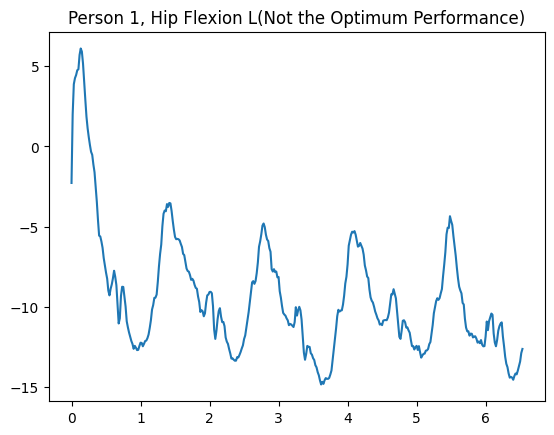

In [29]:
import matplotlib.pyplot as plt

plt.plot(time1, hip_flex_l_1)
plt.title("Person 1, Hip Flexion L(Not the Optimum Performance)")

#### Knee Angle R

In [30]:
knee_angle_r_1 = data["knee_angle_r"]
knee_angle_r_1 = [float(i) for i in knee_angle_r_1]
knee_angle_r_1

[12.78444431,
 13.97257088,
 15.35378575,
 17.74401235,
 20.90898489,
 24.65716789,
 29.60262161,
 36.44096426,
 45.03887537,
 55.05138578,
 65.22981533,
 75.4401387,
 84.87832168,
 94.11040998,
 102.43095893,
 109.4867661,
 115.72797025,
 121.34367348,
 126.67820608,
 130.99832607,
 134.65229209,
 137.3360237,
 139.11219056,
 139.77179568,
 139.79813534,
 139.53789662,
 138.58977826,
 136.37844954,
 133.47504985,
 129.69296852,
 125.24967319,
 119.63353489,
 112.23113246,
 104.20387956,
 94.0565761,
 83.27160519,
 71.66892875,
 58.57526735,
 45.0621679,
 31.27927597,
 17.27951925,
 5.36099407,
 0.27098258,
 0.11173979,
 0.08998472,
 0.09305091,
 0.11521508,
 0.17525423,
 0.40748329,
 1.52063605,
 3.57428242,
 4.98628821,
 5.82371053,
 6.23808079,
 6.01087109,
 6.14359463,
 5.80569638,
 5.6629047,
 5.37141057,
 4.92474237,
 4.71505278,
 4.80649152,
 5.09703847,
 5.80388457,
 6.62768256,
 7.68780823,
 8.86446218,
 10.51856211,
 12.36357391,
 15.1930567,
 17.99293893,
 20.75174298,
 23.6

Text(0.5, 1.0, 'Person 1, Knee Angle R(Not the Optimum Performance)')

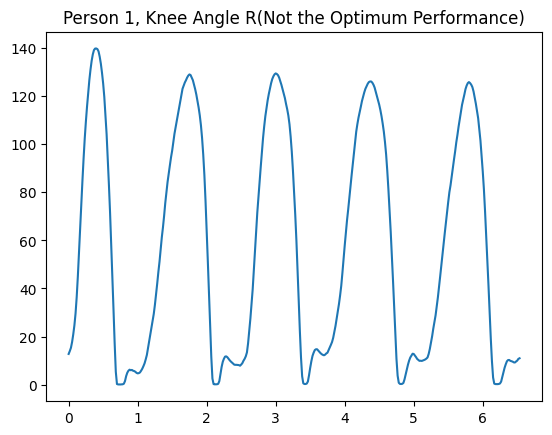

In [31]:
import matplotlib.pyplot as plt

plt.plot(time1, knee_angle_r_1)
plt.title("Person 1, Knee Angle R(Not the Optimum Performance)")

#### Knee Angle L

In [32]:
knee_angle_l_1 = data["knee_angle_l"]
knee_angle_l_1 = [float(i) for i in knee_angle_l_1]
knee_angle_l_1

[9.86553253,
 9.97702784,
 10.10552338,
 9.83685099,
 9.85643487,
 10.14893721,
 10.64621977,
 12.04749928,
 13.27504732,
 13.87268731,
 13.82466354,
 12.90049445,
 12.08794448,
 11.45173993,
 11.13820398,
 10.39209458,
 9.91992004,
 9.65426071,
 9.55172146,
 9.45279691,
 9.70068834,
 9.49219963,
 9.32941991,
 9.32146552,
 9.07018147,
 9.07791012,
 9.1075986,
 9.02479484,
 8.79302561,
 8.45850496,
 8.16697127,
 7.59185382,
 6.61464771,
 5.814545,
 4.9971508,
 5.21242183,
 5.51045982,
 5.88708358,
 6.30941064,
 6.61890701,
 6.3401789,
 6.06450932,
 6.53261467,
 7.24976713,
 7.74156525,
 8.11565642,
 8.21692936,
 8.38608206,
 8.22517089,
 8.26090521,
 8.09508796,
 7.98822772,
 7.86512221,
 7.85760038,
 7.71201766,
 7.65995072,
 7.71051325,
 7.61864661,
 7.59042902,
 7.48420557,
 7.46875527,
 7.48357651,
 7.47736322,
 7.60431641,
 7.77544819,
 8.09630919,
 8.34688825,
 8.35258839,
 8.84244134,
 9.28964832,
 9.5933999,
 9.62328289,
 9.66531099,
 9.64972597,
 9.74021628,
 10.1347216,
 10.78

Text(0.5, 1.0, 'Person 1, Knee Angle L(Not the Optimum Performance)')

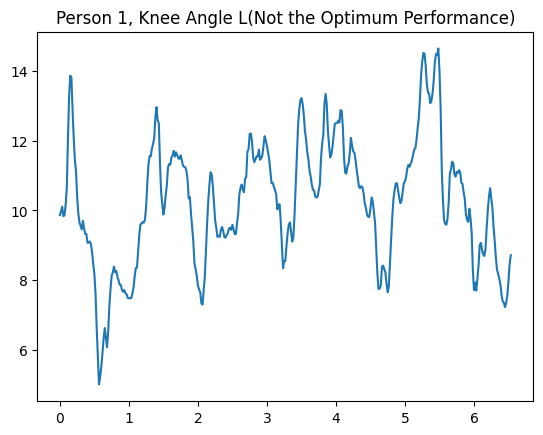

In [33]:
import matplotlib.pyplot as plt

plt.plot(time1, knee_angle_l_1)
plt.title("Person 1, Knee Angle L(Not the Optimum Performance)")

#### Ankle Angle L

In [34]:
ankle_angle_l_1 = data["ankle_angle_l"]
ankle_angle_l_1 = [float(i) for i in ankle_angle_l_1]
ankle_angle_l_1

[12.03796866,
 12.0696942,
 12.39979446,
 12.23410354,
 12.21285149,
 12.20520799,
 12.0348873,
 11.91975783,
 12.21102618,
 12.72792631,
 13.18005313,
 13.58364496,
 13.22034118,
 12.83740067,
 12.36344217,
 11.9780799,
 11.19621419,
 10.27607969,
 9.28064067,
 9.20048635,
 8.9738685,
 8.98410516,
 9.08443008,
 9.42332663,
 9.21670674,
 9.40342323,
 9.38535188,
 9.51753141,
 9.84774432,
 9.84368155,
 9.6664087,
 9.70585031,
 9.17885564,
 8.55530156,
 7.26549669,
 6.42826712,
 5.46905037,
 4.41762237,
 5.2820185,
 6.9150731,
 8.76438397,
 10.89062343,
 13.79636876,
 15.95601045,
 17.32495237,
 17.33239613,
 16.09556299,
 14.93190869,
 13.40108652,
 12.37623916,
 11.56607698,
 10.93263683,
 10.73599769,
 10.72855671,
 10.9203659,
 11.26059634,
 11.54659295,
 11.70753118,
 11.78309732,
 11.0859397,
 10.66680792,
 10.6686646,
 10.80187773,
 11.12937895,
 11.00004027,
 11.07080681,
 11.11228911,
 11.29243066,
 11.57578583,
 11.7493337,
 11.70520783,
 11.35946669,
 11.20265993,
 10.28185839

Text(0.5, 1.0, 'Person 1, Ankle Angle L(Not the Optimum Performance)')

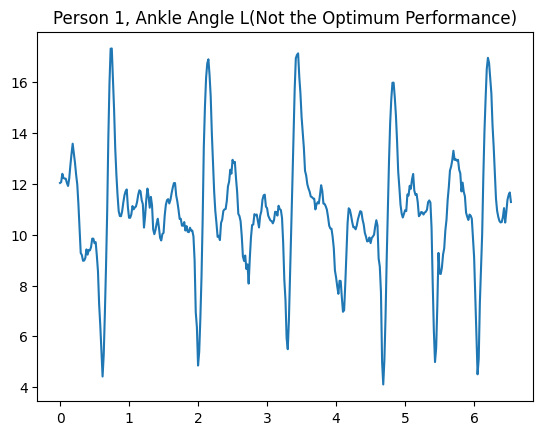

In [35]:
import matplotlib.pyplot as plt

plt.plot(time1, ankle_angle_l_1)
plt.title("Person 1, Ankle Angle L(Not the Optimum Performance)")

#### Ankle Angle L

In [36]:
ankle_angle_r_1 = data["ankle_angle_r"]
ankle_angle_r_1 = [float(i) for i in ankle_angle_r_1]
ankle_angle_r_1

[4.26397543,
 7.19383313,
 8.46070357,
 9.17936007,
 9.5709041,
 9.08402936,
 8.647121,
 8.38310185,
 8.17551941,
 7.70276185,
 6.67470358,
 5.04298795,
 3.86559504,
 1.78500206,
 -1.06252854,
 -2.76167338,
 -4.69949805,
 -6.12949896,
 -8.00440876,
 -8.52630948,
 -8.95939764,
 -8.86113829,
 -8.05537999,
 -7.0896318,
 -6.42881445,
 -8.17811003,
 -11.00179651,
 -13.74054126,
 -16.81423122,
 -18.03483322,
 -18.5565249,
 -18.62565463,
 -19.29372672,
 -18.03534984,
 -14.82014724,
 -10.52812307,
 -9.61565064,
 -10.61329927,
 -13.01190999,
 -14.78084696,
 -12.87163517,
 -8.56590724,
 -3.25099102,
 1.36314029,
 3.10659123,
 1.82179211,
 -1.53314619,
 -5.79036298,
 -10.47731729,
 -13.40169877,
 -14.83620784,
 -16.18803984,
 -15.62967321,
 -14.82884656,
 -13.90397183,
 -12.39364566,
 -10.90924633,
 -9.78349017,
 -8.85014671,
 -8.81326367,
 -8.60872369,
 -8.32484305,
 -8.32995857,
 -7.71395845,
 -7.43882311,
 -7.36678068,
 -7.36316836,
 -7.17314451,
 -7.10223883,
 -7.28286616,
 -7.32290743,
 -7.1

Text(0.5, 1.0, 'Person 1, Ankle Angle R(Not the Optimum Performance)')

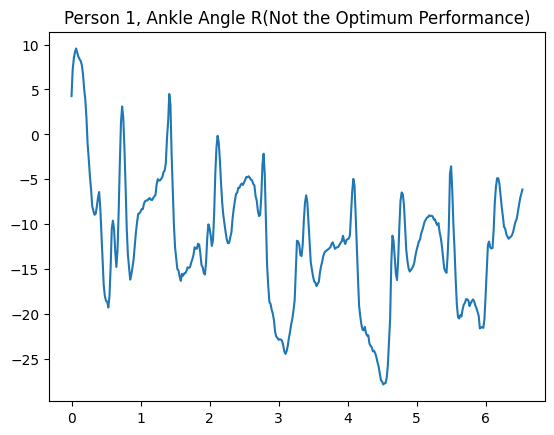

In [37]:
import matplotlib.pyplot as plt

plt.plot(time1, ankle_angle_r_1)
plt.title("Person 1, Ankle Angle R(Not the Optimum Performance)")

#### Lumbar Bending Analysis Initial

In [38]:
lumbar_bending_1 = data["lumbar_bending"]
lumbar_bending_1 = [float(i) for i in lumbar_bending_1]
lumbar_bending_1

[6.09232528,
 5.33476385,
 4.48917845,
 4.10663966,
 4.10425402,
 4.11624908,
 4.33957977,
 4.47607464,
 4.74756578,
 4.98170838,
 5.41957529,
 6.12825654,
 7.15620576,
 8.23993989,
 9.65261712,
 10.94967328,
 12.22407882,
 13.82471224,
 15.39997923,
 16.50497964,
 17.03725592,
 17.07202892,
 16.70290184,
 17.07749091,
 16.70874536,
 15.97810116,
 15.80342997,
 15.70389564,
 15.0825404,
 13.9610679,
 12.69454007,
 11.46137315,
 10.55757424,
 9.99884201,
 9.3470367,
 8.23238928,
 7.6196159,
 7.28309743,
 6.10984882,
 4.8125566,
 3.28532339,
 1.16801002,
 -1.06328364,
 -2.74214603,
 -2.30347868,
 -0.89845132,
 1.18192282,
 3.27059404,
 5.20852854,
 6.77990092,
 7.76272501,
 8.15433588,
 8.25985625,
 8.16161409,
 8.09784158,
 7.94362922,
 7.55965251,
 7.14897791,
 6.78127802,
 6.37197986,
 6.11618962,
 5.98432216,
 6.0637221,
 5.92577121,
 5.82680022,
 5.76555868,
 5.91739576,
 6.00959187,
 6.17244351,
 6.18691529,
 6.27883469,
 6.51535442,
 6.7220335,
 7.100651,
 7.45706103,
 7.38037223,

Text(0.5, 1.0, 'Person 1, Lumbar Bending(Not the Optimum Performance)')

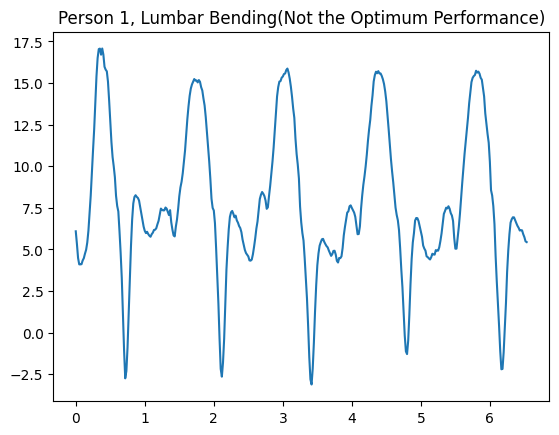

In [39]:
import matplotlib.pyplot as plt

plt.plot(time1, lumbar_bending_1)
plt.title("Person 1, Lumbar Bending(Not the Optimum Performance)")

#### Lumbar Extension Analysis Initial

In [40]:
lumbar_extension_1 = data["lumbar_extension"]
lumbar_extension_1 = [float(i) for i in lumbar_extension_1]
lumbar_extension_1

[-7.73082303,
 -1.92616813,
 0.24686229,
 1.11338261,
 1.20500501,
 1.15220817,
 0.65578426,
 0.54486975,
 -0.06868279,
 -0.86334774,
 -2.13458926,
 -3.35417039,
 -4.83298017,
 -5.98520422,
 -6.87314079,
 -7.63956808,
 -8.49094839,
 -9.67777537,
 -10.61195716,
 -11.60199858,
 -12.52674499,
 -13.19127571,
 -13.91839232,
 -15.33693137,
 -15.73370781,
 -15.60846729,
 -15.63107519,
 -15.59501828,
 -15.57981931,
 -15.44466341,
 -15.42215234,
 -14.94757751,
 -14.49798826,
 -14.16732489,
 -13.45488741,
 -13.42578072,
 -12.95408626,
 -12.65081488,
 -12.3408519,
 -11.88546094,
 -11.8884543,
 -11.85841793,
 -11.41285593,
 -10.74582696,
 -10.8245379,
 -11.35532733,
 -12.23423683,
 -13.41690668,
 -14.67689764,
 -15.18230798,
 -15.61051495,
 -15.68606131,
 -15.61763516,
 -15.47031958,
 -15.36141049,
 -14.63419816,
 -14.4086876,
 -14.14594021,
 -13.96198326,
 -13.8619973,
 -13.97149573,
 -14.12219821,
 -14.23909261,
 -14.10577604,
 -13.99848677,
 -13.82294627,
 -13.6769554,
 -13.21582619,
 -13.19500

Text(0.5, 1.0, 'Person 1, Lumbar Extension(Not the Optimum Performance)')

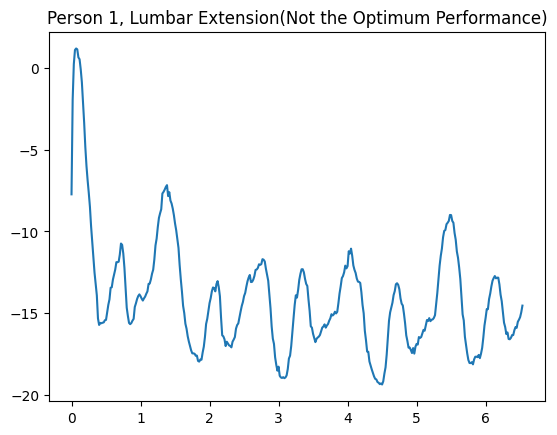

In [41]:
import matplotlib.pyplot as plt

plt.plot(time1, lumbar_extension_1)
plt.title("Person 1, Lumbar Extension(Not the Optimum Performance)")

### The Proper Football Kick  Analysis

In [76]:
data = readKinematicsData("C:/Users/Jatin/Desktop/Engineering/ROBOTICS PROGRAM NUS/PROJECT/OpenCAP/DATA/NUS_PROJECT_DATA/OpenSimData/Kinematics/Football_Full_Motion.mot")

In [77]:
data

{'nRows': '418\n',
 'nColumns': '36\n',
 'inDegrees': 'yes\n',
 'Units': 'Units are S.I. units (second, meters, Newtons, ...)\n',
 'time': ['      0.00000000',
  '      0.01666670',
  '      0.03333330',
  '      0.05000000',
  '      0.06666670',
  '      0.08333330',
  '      0.10000000',
  '      0.11666670',
  '      0.13333330',
  '      0.15000000',
  '      0.16666670',
  '      0.18333330',
  '      0.20000000',
  '      0.21666670',
  '      0.23333330',
  '      0.25000000',
  '      0.26666670',
  '      0.28333330',
  '      0.30000000',
  '      0.31666670',
  '      0.33333330',
  '      0.35000000',
  '      0.36666670',
  '      0.38333330',
  '      0.40000000',
  '      0.41666670',
  '      0.43333330',
  '      0.45000000',
  '      0.46666670',
  '      0.48333330',
  '      0.50000000',
  '      0.51666670',
  '      0.53333330',
  '      0.55000000',
  '      0.56666670',
  '      0.58333330',
  '      0.60000000',
  '      0.61666670',
  '      0.63333330',
  ' 

In [78]:
time2 = data["time"]
time2 = [float(i) for i in time2]
time2

[0.0,
 0.0166667,
 0.0333333,
 0.05,
 0.0666667,
 0.0833333,
 0.1,
 0.1166667,
 0.1333333,
 0.15,
 0.1666667,
 0.1833333,
 0.2,
 0.2166667,
 0.2333333,
 0.25,
 0.2666667,
 0.2833333,
 0.3,
 0.3166667,
 0.3333333,
 0.35,
 0.3666667,
 0.3833333,
 0.4,
 0.4166667,
 0.4333333,
 0.45,
 0.4666667,
 0.4833333,
 0.5,
 0.5166667,
 0.5333333,
 0.55,
 0.5666667,
 0.5833333,
 0.6,
 0.6166667,
 0.6333333,
 0.65,
 0.6666667,
 0.6833333,
 0.7,
 0.7166667,
 0.7333333,
 0.75,
 0.7666667,
 0.7833333,
 0.8,
 0.8166667,
 0.8333333,
 0.85,
 0.8666667,
 0.8833333,
 0.9,
 0.9166667,
 0.9333333,
 0.95,
 0.9666667,
 0.9833333,
 1.0,
 1.0166667,
 1.0333333,
 1.05,
 1.0666667,
 1.0833333,
 1.1,
 1.1166667,
 1.1333333,
 1.15,
 1.1666667,
 1.1833333,
 1.2,
 1.2166667,
 1.2333333,
 1.25,
 1.2666667,
 1.2833333,
 1.3,
 1.3166667,
 1.3333333,
 1.35,
 1.3666667,
 1.3833333,
 1.4,
 1.4166667,
 1.4333333,
 1.45,
 1.4666667,
 1.4833333,
 1.5,
 1.5166667,
 1.5333333,
 1.55,
 1.5666667,
 1.5833333,
 1.6,
 1.6166667,
 1.633

#### Arm Rotation Left

In [79]:
arm_rot_l_2 = data["arm_rot_l"]
arm_rot_l_2 = [float(i) for i in arm_rot_l_2]

Text(0.5, 1.0, 'Arm Rotation Left analysis(Optimum Performance)')

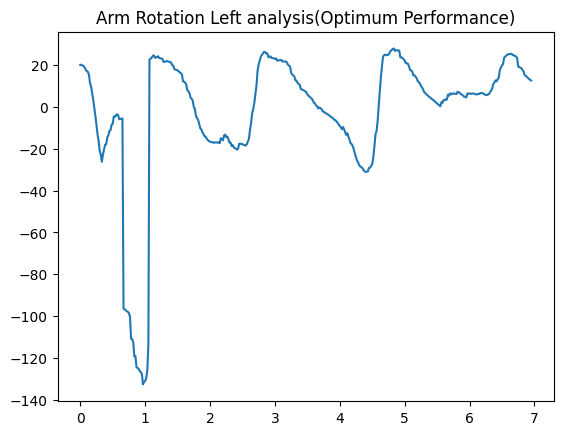

In [80]:
import matplotlib.pyplot as plt

plt.plot(time2, arm_rot_l_2)
plt.title("Arm Rotation Left analysis(Optimum Performance)")

#### Arm Rotation Right

In [81]:
arm_rot_r_2 = data["arm_rot_r"]
arm_rot_r_2 = [float(i) for i in arm_rot_r_2]

Text(0.5, 1.0, 'Arm Rotation R analysis(Optimum Performance)')

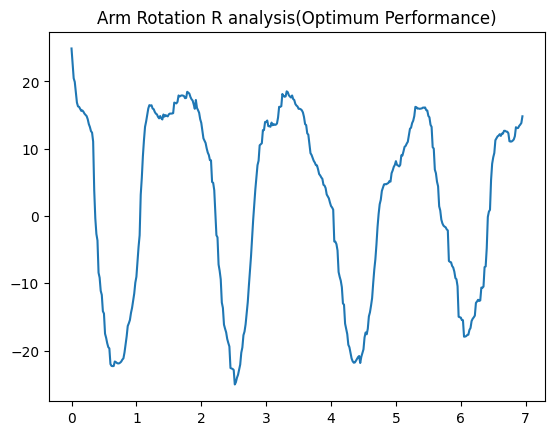

In [82]:
import matplotlib.pyplot as plt

plt.plot(time2, arm_rot_r_2)
plt.title("Arm Rotation R analysis(Optimum Performance)")

#### Arm Flexion Left

In [83]:
arm_flex_l_2 = data["arm_flex_l"]
arm_flex_l_2 = [float(i) for i in arm_flex_l_2]

Text(0.5, 1.0, 'Arm Flexion Left analysis(Optimum Performance)')

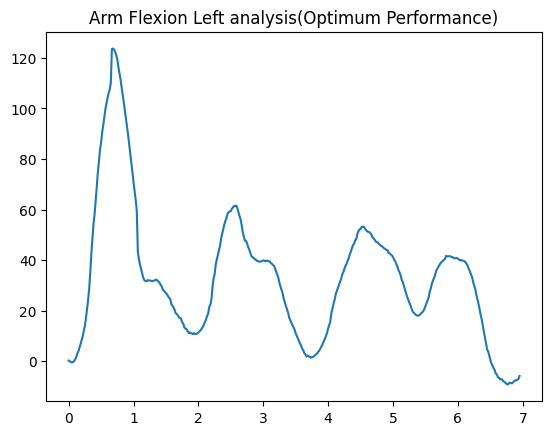

In [84]:
import matplotlib.pyplot as plt

plt.plot(time2, arm_flex_l_2)
plt.title("Arm Flexion Left analysis(Optimum Performance)")

#### Arm Flexion Right

In [85]:
arm_flex_r_2 = data["arm_flex_r"]
arm_flex_r_2 = [float(i) for i in arm_flex_r_2]

Text(0.5, 1.0, 'Arm Flexion Right analysis(Optimum Performance)')

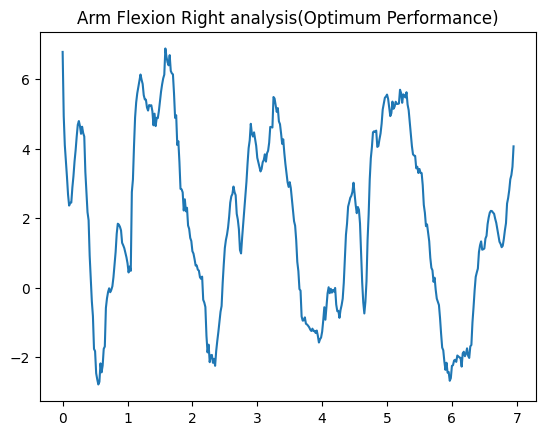

In [86]:
import matplotlib.pyplot as plt

plt.plot(time2, arm_flex_r_2)
plt.title("Arm Flexion Right analysis(Optimum Performance)")

#### Hip Flex Right

In [87]:
hip_flex_2 = data["hip_flexion_r"]
hip_flex_2 = [float(i) for i in hip_flex_2]

In [88]:
hip_flex_2

[-1.06686548,
 2.45544719,
 3.3471379,
 2.98007257,
 2.38492422,
 1.94274635,
 1.77761718,
 1.78268365,
 1.65397904,
 1.98581218,
 2.09489552,
 2.3923252,
 2.40834085,
 2.60582731,
 2.73156229,
 2.74670343,
 3.07769602,
 3.45551621,
 4.26429023,
 4.92128006,
 6.21410914,
 7.35374295,
 8.92241066,
 10.66979603,
 12.6502022,
 14.34363784,
 16.34819671,
 18.48163909,
 20.14563455,
 21.19937935,
 21.40143628,
 21.68566303,
 21.89968329,
 21.20646028,
 20.8526574,
 19.73828705,
 18.29853558,
 17.56781792,
 18.03184919,
 19.04955799,
 19.85689158,
 20.44721374,
 21.37597147,
 21.74747721,
 22.01619873,
 22.83045449,
 23.99733276,
 25.3024143,
 27.34005898,
 30.20363893,
 32.31564433,
 33.37865449,
 33.29629874,
 33.54611478,
 34.80503527,
 34.1507944,
 34.45713176,
 33.31131513,
 31.74407669,
 30.58149298,
 29.61307762,
 29.52138686,
 29.9200824,
 30.74768116,
 32.67221455,
 34.66617777,
 36.59107203,
 38.48968682,
 39.67535551,
 41.07471269,
 42.59163039,
 44.48250647,
 46.16336176,
 47.302

Text(0.5, 1.0, 'Hip Flexion R analysis(Optimum Performance)')

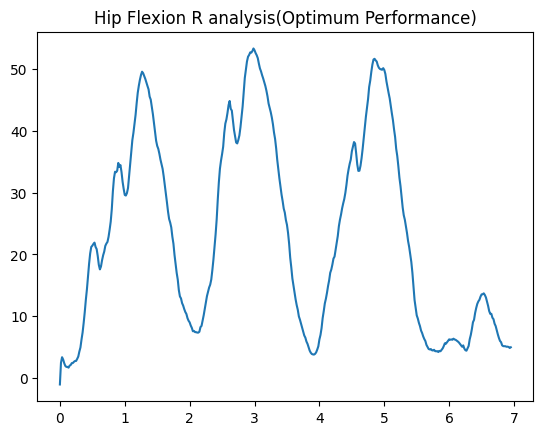

In [89]:
import matplotlib.pyplot as plt

plt.plot(time2, hip_flex_2)
plt.title("Hip Flexion R analysis(Optimum Performance)")

#### Hip Flexion L Analysis(Optimum Performance)

In [90]:
hip_flex_2_l = data["hip_flexion_l"]
hip_flex_2_l = [float(i) for i in hip_flex_2_l]

In [91]:
hip_flex_2_l

[-3.13415449,
 0.49294292,
 1.94701922,
 1.72063474,
 1.17484328,
 0.77811173,
 0.57807977,
 0.65923154,
 0.56493341,
 0.91119963,
 0.9538406,
 1.28441224,
 1.41627245,
 1.76473905,
 2.05543722,
 2.11698314,
 2.30938985,
 2.4467472,
 2.94215693,
 3.10073501,
 3.81142512,
 4.22630198,
 4.85399942,
 5.68173775,
 6.70419382,
 7.2335701,
 7.98583176,
 8.73977694,
 9.38903856,
 9.47395166,
 9.04878563,
 8.62486742,
 8.18797911,
 7.69164628,
 7.32027988,
 7.05312475,
 6.47027337,
 6.12664841,
 6.33873945,
 6.60796327,
 6.39547165,
 6.42610756,
 6.54761032,
 6.30264428,
 6.09331992,
 6.1607595,
 6.30515923,
 6.40596143,
 6.924569,
 7.80752296,
 8.25415482,
 7.8869584,
 7.27761606,
 6.65158468,
 5.3402461,
 3.76611403,
 3.39585285,
 1.79928769,
 -0.15573254,
 -1.96670954,
 -3.98262341,
 -5.55245588,
 -7.09579465,
 -8.43781512,
 -8.88723978,
 -9.66826409,
 -10.23843291,
 -10.91330474,
 -11.68285682,
 -12.19852805,
 -12.44325369,
 -12.31832665,
 -11.78779792,
 -11.68748375,
 -11.56428796,
 -11.5

Text(0.5, 1.0, 'Hip Flexion L analysis(Optimum Performance)')

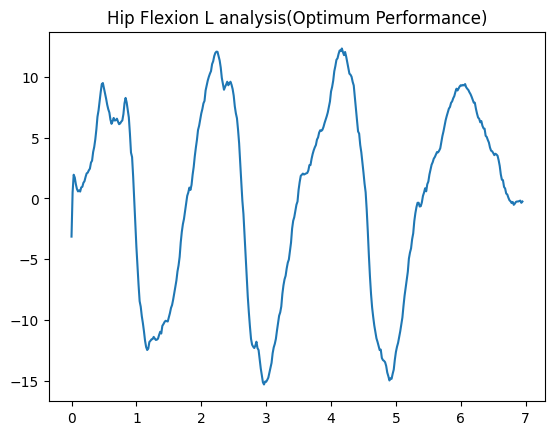

In [92]:
import matplotlib.pyplot as plt

plt.plot(time2, hip_flex_2_l)
plt.title("Hip Flexion L analysis(Optimum Performance)")

#### Knee Angle R Analysis(Optimum Performance)

In [93]:
knee_angle_r_2 = data["knee_angle_r"]
knee_angle_r_2 = [float(i) for i in knee_angle_r_2]
knee_angle_r_2

[7.40148858,
 7.05115937,
 5.83169943,
 4.81586905,
 4.48843019,
 4.48793448,
 4.65636181,
 4.81446474,
 5.02797822,
 5.36987405,
 5.54128936,
 5.70980351,
 5.71007087,
 5.69297974,
 5.79667426,
 6.05819526,
 6.60110889,
 7.21649813,
 8.10357395,
 9.32901626,
 11.22621658,
 13.69239586,
 16.98159496,
 21.07242126,
 25.92570613,
 31.74459682,
 38.6471882,
 46.3985307,
 53.74194599,
 60.41894898,
 65.95252787,
 71.53396786,
 76.24826183,
 80.53490286,
 84.13731372,
 87.08613083,
 89.29552163,
 91.43256138,
 93.65504269,
 95.58504694,
 97.44554955,
 98.13325235,
 98.36755223,
 98.03481097,
 97.44281883,
 96.42734992,
 93.77015019,
 90.7302391,
 88.12629548,
 85.0029873,
 81.21668543,
 77.26899821,
 71.8948838,
 65.93435539,
 59.94178804,
 52.35528771,
 44.14533686,
 34.47442571,
 25.2183608,
 17.12040517,
 11.35320071,
 7.11496507,
 4.39863832,
 2.66679628,
 1.54342268,
 0.8854798,
 0.69562303,
 0.62664552,
 0.79895352,
 1.01953147,
 1.54725403,
 2.52876744,
 3.23756705,
 4.1093424,
 4.96

Text(0.5, 1.0, 'Hip Flexion R analysis(Optimum Performance)')

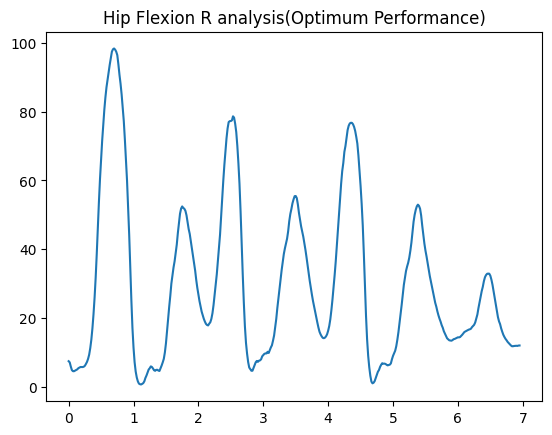

In [94]:
import matplotlib.pyplot as plt

plt.plot(time2, knee_angle_r_2)
plt.title("Hip Flexion R analysis(Optimum Performance)")

#### Knee Angle L Analysis(Optimum Performance)

In [95]:
knee_angle_l_2 = data["knee_angle_l"]
knee_angle_l_2 = [float(i) for i in knee_angle_l_2]
knee_angle_l_2

[8.39549478,
 7.73879557,
 7.46995226,
 6.7189326,
 6.50031906,
 6.35462539,
 6.25376293,
 6.44265497,
 6.67585805,
 7.03294612,
 7.06672478,
 7.37325861,
 7.70383403,
 8.04411195,
 8.40504879,
 8.71521099,
 8.96531351,
 9.15855286,
 9.47987464,
 9.76660704,
 10.72438264,
 11.56267183,
 12.45985523,
 13.67057483,
 14.91148503,
 15.85525695,
 16.84819034,
 17.79261826,
 18.47941794,
 18.53138725,
 18.14323379,
 17.56161187,
 16.8664142,
 16.55988,
 16.02380549,
 15.50926697,
 14.99009561,
 14.87309106,
 15.09195542,
 15.32263269,
 15.7046076,
 16.08302185,
 16.29854886,
 16.12607116,
 15.86193012,
 15.75758575,
 15.20941835,
 14.84248504,
 14.84492299,
 14.77836817,
 15.16093435,
 15.36956817,
 15.45902105,
 15.52588292,
 14.21876056,
 13.28221843,
 13.1190537,
 13.10298059,
 12.86042152,
 12.72971637,
 12.39825317,
 12.25483898,
 12.0056139,
 12.05869621,
 12.0517374,
 11.9174752,
 11.69667869,
 11.0918491,
 10.48274317,
 9.77259277,
 9.38424633,
 9.24853162,
 9.32449405,
 9.40004669,


Text(0.5, 1.0, 'Hip Flexion L analysis(Optimum Performance)')

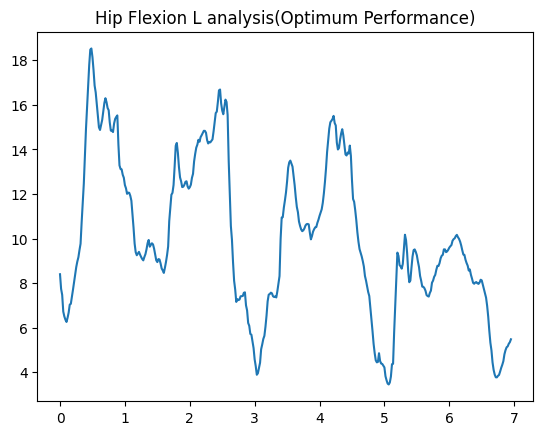

In [96]:
import matplotlib.pyplot as plt

plt.plot(time2, knee_angle_l_2)
plt.title("Hip Flexion L analysis(Optimum Performance)")

#### Ankle Angle L

In [97]:
ankle_angle_l_2 = data["ankle_angle_l"]
ankle_angle_l_2 = [float(i) for i in ankle_angle_l_2]
ankle_angle_l_2

[10.89699778,
 11.2625275,
 10.58876122,
 9.46219825,
 9.49584641,
 9.69759914,
 9.81974348,
 9.84383736,
 9.93328013,
 9.78606665,
 9.31787286,
 8.58563133,
 7.7239327,
 7.22420834,
 6.61125344,
 6.73666507,
 7.03829011,
 7.23440408,
 7.90570532,
 8.37327202,
 8.83079012,
 9.23727694,
 9.91209067,
 10.42946236,
 10.92670397,
 11.72921371,
 12.78704399,
 14.1030309,
 15.08509121,
 15.87232843,
 15.80204092,
 15.96199574,
 15.8737256,
 14.99761633,
 14.55179467,
 13.47529903,
 12.64104345,
 12.48210636,
 12.49360568,
 12.32528557,
 12.56646766,
 12.80885019,
 13.22211425,
 13.23684524,
 13.26192843,
 13.41256013,
 12.40062686,
 11.52801972,
 10.68262646,
 10.10394056,
 9.37972451,
 8.91450281,
 8.30564877,
 8.73579463,
 9.67292789,
 10.63203016,
 10.79700279,
 9.269985,
 9.33356031,
 9.75858906,
 10.14958174,
 11.09103777,
 11.85857101,
 13.19068518,
 13.57706615,
 14.14584472,
 13.76197826,
 12.89568416,
 12.29093065,
 11.71588037,
 11.34966968,
 11.20597172,
 10.68306442,
 10.33500973

Text(0.5, 1.0, 'Ankle Angle L analysis(Optimum Performance)')

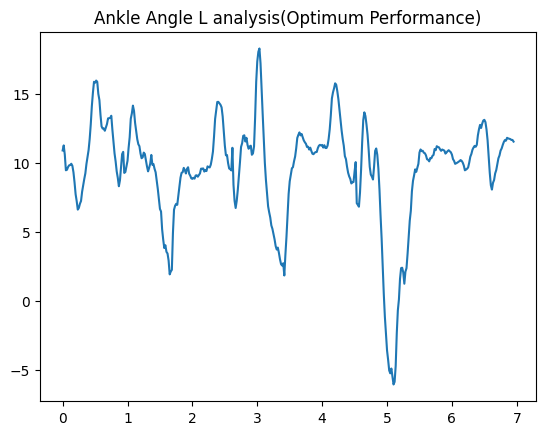

In [98]:
import matplotlib.pyplot as plt

plt.plot(time2, ankle_angle_l_2)
plt.title("Ankle Angle L analysis(Optimum Performance)")

#### Ankle Angle R

In [99]:
ankle_angle_r_2 = data["ankle_angle_r"]
ankle_angle_r_2 = [float(i) for i in ankle_angle_r_2]
ankle_angle_r_2

[3.33068741,
 6.77073972,
 7.32929616,
 7.27474597,
 7.93673889,
 8.62974392,
 9.09996744,
 8.98916699,
 8.93966348,
 8.73412538,
 8.28477538,
 7.4800169,
 6.95363452,
 6.50418227,
 6.15567027,
 6.18836115,
 6.21492809,
 6.49094346,
 6.69513065,
 7.01036646,
 7.31360782,
 7.46477653,
 7.86678755,
 8.30919923,
 8.3314147,
 8.40804186,
 8.46638048,
 8.38412474,
 7.8696292,
 7.0507261,
 4.62733226,
 1.62786777,
 -0.67761619,
 -5.83631567,
 -11.46537553,
 -16.11784859,
 -19.44431599,
 -21.83744668,
 -23.88722651,
 -25.80769633,
 -27.41152743,
 -28.94319288,
 -29.7739192,
 -30.4090462,
 -30.87401825,
 -31.00458105,
 -33.00782012,
 -35.994609,
 -38.83012552,
 -38.70375692,
 -28.78567506,
 -18.69460792,
 -11.06786448,
 -7.67631759,
 -6.60228498,
 -9.46783029,
 -13.50815632,
 -17.20771539,
 -17.36191426,
 -15.82307435,
 -14.76399759,
 -14.05602306,
 -13.76811752,
 -13.5272588,
 -13.69771202,
 -13.50254492,
 -13.59577992,
 -13.97083853,
 -13.17418636,
 -13.00386175,
 -12.89761811,
 -13.0942858,

Text(0.5, 1.0, 'Ankle Angle R analysis(Optimum Performance)')

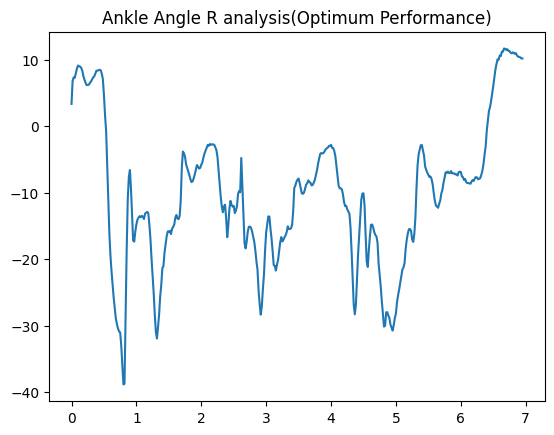

In [100]:
import matplotlib.pyplot as plt

plt.plot(time2, ankle_angle_r_2)
plt.title("Ankle Angle R analysis(Optimum Performance)")

#### Lumbar Bending Final Analysis

In [101]:
lumbar_bending_2 = data["lumbar_bending"]
lumbar_bending_2 = [float(i) for i in lumbar_bending_2]
lumbar_bending_2

[5.65615422,
 4.82727958,
 3.80970451,
 3.22927647,
 2.98054598,
 2.82268746,
 2.70827717,
 2.65843208,
 2.60374109,
 2.61538167,
 2.6971286,
 2.7091022,
 2.62330676,
 2.54758607,
 2.37028194,
 2.24575966,
 2.23987639,
 2.16742177,
 2.30224206,
 2.42146293,
 2.59490369,
 2.69956099,
 2.89188313,
 3.224545,
 3.59541226,
 3.98042999,
 4.36280515,
 4.79351687,
 5.35348598,
 5.88881917,
 6.68103378,
 7.48484265,
 8.8601519,
 9.88321613,
 10.93526309,
 11.69847125,
 12.17714613,
 12.75592584,
 13.26704118,
 13.39435083,
 13.38191076,
 13.61025113,
 13.73922513,
 13.93805113,
 14.40564019,
 14.7533904,
 15.27682059,
 15.77807024,
 15.93203349,
 15.93320145,
 15.79401918,
 15.38484496,
 15.03007503,
 14.62994271,
 14.23251211,
 13.58028762,
 11.79189708,
 9.57212098,
 7.97295928,
 6.04683608,
 4.47399012,
 3.09665972,
 2.55000296,
 2.40437638,
 4.28292341,
 4.61819494,
 4.83232035,
 4.56879455,
 4.98169087,
 5.35871757,
 5.96293397,
 5.99340527,
 5.94102739,
 5.64934244,
 5.82937315,
 6.22400

Text(0.5, 1.0, 'Lumbar Bending analysis(Optimum Performance)')

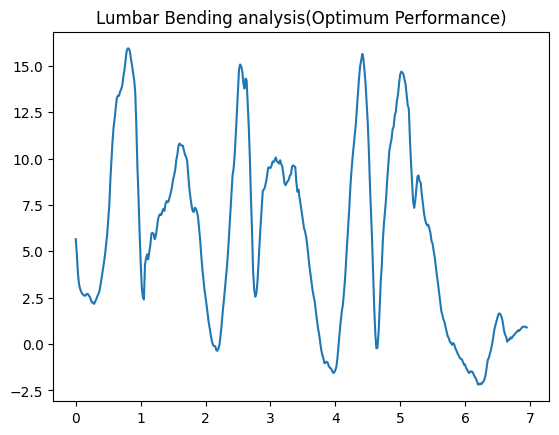

In [102]:
import matplotlib.pyplot as plt

plt.plot(time2, lumbar_bending_2)
plt.title("Lumbar Bending analysis(Optimum Performance)")

#### Lumbar Extension Final Analysis

In [103]:
lumbar_extension_2 = data["lumbar_extension"]
lumbar_extension_2 = [float(i) for i in lumbar_extension_2]
lumbar_extension_2

[-7.88374022,
 -1.82348027,
 0.53917674,
 1.18370956,
 1.04827389,
 1.04583413,
 1.07570588,
 0.96656124,
 0.27305255,
 0.00422364,
 -0.60449715,
 -0.96635461,
 -1.39103894,
 -1.61281915,
 -2.0024884,
 -2.47273992,
 -2.80794053,
 -3.36303205,
 -3.49290609,
 -3.80591128,
 -3.90914564,
 -4.37309453,
 -4.36260746,
 -4.38044078,
 -3.89628046,
 -3.87906799,
 -3.51772008,
 -2.98907927,
 -2.19202512,
 -2.0359666,
 -1.87438575,
 -1.92470606,
 -2.0702278,
 -2.35617099,
 -2.71798219,
 -2.8812647,
 -3.23487552,
 -3.73301929,
 -4.04562884,
 -4.29006333,
 -5.38858024,
 -5.57966666,
 -5.36087502,
 -5.08576002,
 -4.68576771,
 -3.99034251,
 -3.09487478,
 -2.70905945,
 -2.36509411,
 -1.41092876,
 -1.58282108,
 -2.09674866,
 -2.69983631,
 -3.36102882,
 -3.79372885,
 -4.87426618,
 -5.36663977,
 -6.63192687,
 -8.16936711,
 -10.26395986,
 -12.14559061,
 -13.53289982,
 -14.79897729,
 -15.60310765,
 -16.20770372,
 -17.05914503,
 -18.13836115,
 -19.25729159,
 -20.03526878,
 -20.65619744,
 -21.19911334,
 -21.7

Text(0.5, 1.0, 'Lumbar Extension analysis(Optimum Performance)')

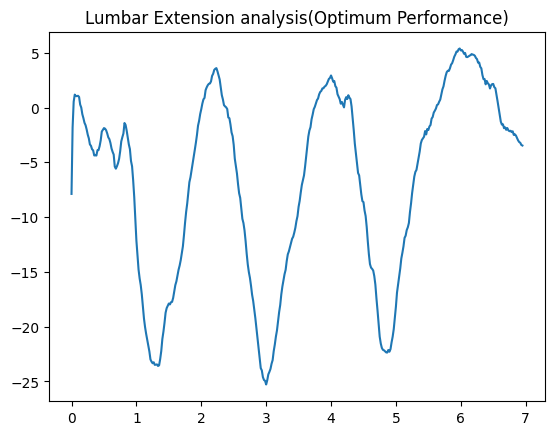

In [104]:
import matplotlib.pyplot as plt

plt.plot(time2, lumbar_extension_2)
plt.title("Lumbar Extension analysis(Optimum Performance)")

### Plotting Both Together for Analysis

### Arm Flexion

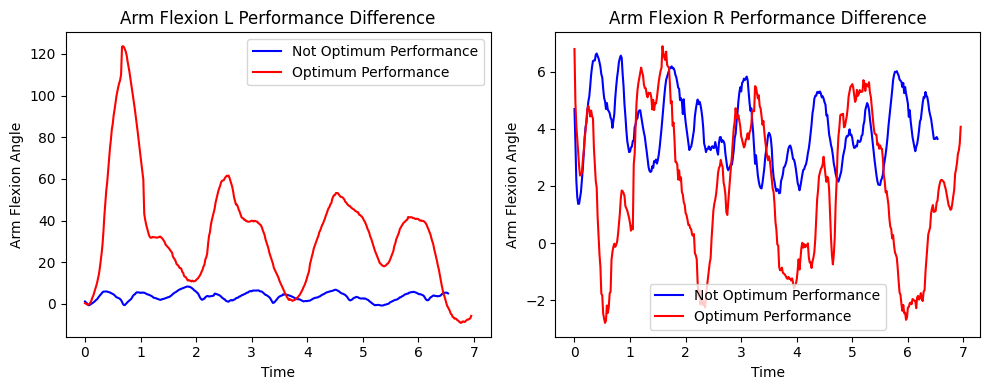

In [111]:
import matplotlib.pyplot as plt
import mplcursors
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, arm_flex_l_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, arm_flex_l_2, label='Optimum Performance', color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Arm Flexion Angle')
# Use mplcursors to add hover annotations
# mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f'({sel.target[0]:.2f}, {sel.target[1]:.2f})'))
ax1.set_title("Arm Flexion L Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, arm_flex_r_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, arm_flex_r_2, label='Optimum Performance', color='red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Arm Flexion Angle')
# mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(f'({sel.target[0]:.2f}, {sel.target[1]:.2f})'))

ax2.set_title('Arm Flexion R Performance Difference')

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Arm Rotation

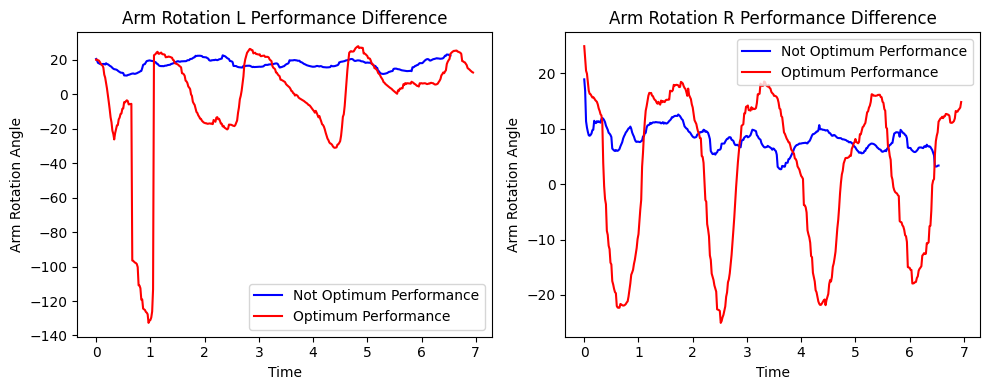

In [112]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, arm_rot_l_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, arm_rot_l_2, label='Optimum Performance', color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Arm Rotation Angle')
ax1.set_title("Arm Rotation L Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, arm_rot_r_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, arm_rot_r_2, label='Optimum Performance', color='red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Arm Rotation Angle')
ax2.set_title('Arm Rotation R Performance Difference')

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Hip Flexion

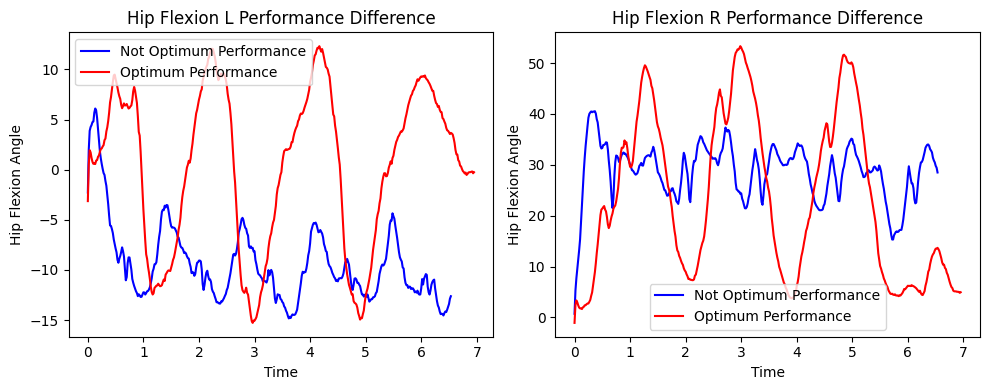

In [113]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, hip_flex_l_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, hip_flex_2_l, label='Optimum Performance', color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Hip Flexion Angle')
ax1.set_title("Hip Flexion L Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, hip_flex_r_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, hip_flex_2, label='Optimum Performance', color='red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Hip Flexion Angle')
ax2.set_title('Hip Flexion R Performance Difference')

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Knee Angle

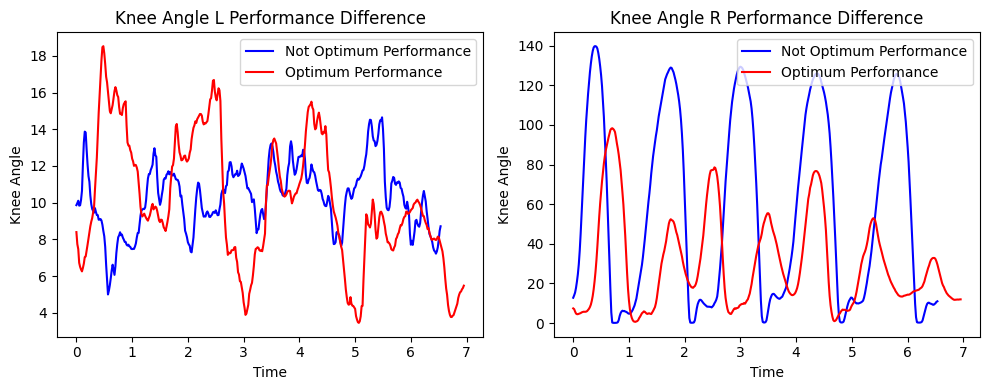

In [114]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, knee_angle_l_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, knee_angle_l_2, label='Optimum Performance', color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Knee Angle')
ax1.set_title("Knee Angle L Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, knee_angle_r_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, knee_angle_r_2, label='Optimum Performance', color='red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Knee Angle')
ax2.set_title("Knee Angle R Performance Difference")

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Ankle Angle 

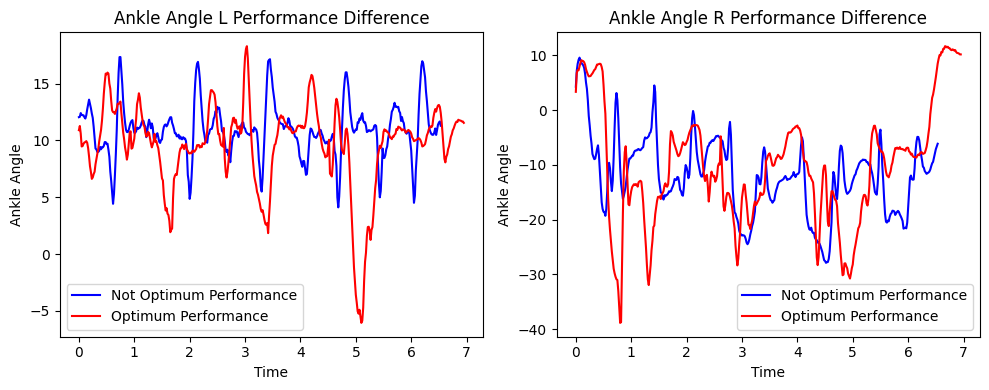

In [115]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, ankle_angle_l_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, ankle_angle_l_2, label='Optimum Performance', color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Ankle Angle')
ax1.set_title("Ankle Angle L Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, ankle_angle_r_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, ankle_angle_r_2, label='Optimum Performance', color='red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Ankle Angle')
ax2.set_title("Ankle Angle R Performance Difference")

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Lumbar Bending and Extension

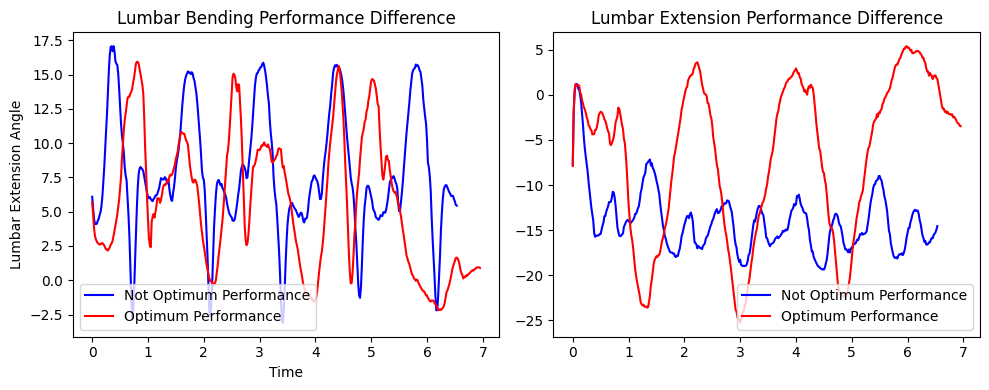

In [117]:
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# Plot the first graph on the first subplot
ax1.plot(time1, lumbar_bending_1, label='Not Optimum Performance', color='blue')
ax1.plot(time2, lumbar_bending_2, label='Optimum Performance', color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Lumbar Bending Angle')
ax1.set_title("Lumbar Bending Performance Difference")

# Plot the second graph on the second subplot
ax2.plot(time1, lumbar_extension_1, label='Not Optimum Performance', color='blue')
ax2.plot(time2, lumbar_extension_2, label='Optimum Performance', color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Lumbar Extension Angle')
ax2.set_title("Lumbar Extension Performance Difference")

ax1.legend()
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()